In [17]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim
import pandas as pd

In [18]:
def visualize_precision_and_recall(precision_baseline, recall_baseline, precision2, recall2, first_label, second_label):
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(recall_baseline, precision_baseline, c='blue', marker='o', label=first_label)

    plt.scatter(recall2, precision2, c='red', marker='o', label=second_label)

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt

def define_y_x_all_data(data_name, stratify_feature, drop_feature):
    data = []
    if (data_name) == 'Bryant':
        data = pd.read_csv(
            '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Bryant et al 2010.csv')

    else:
        if (data_name) == 'Rozenberg':
            data = pd.read_csv(
                '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Rozenberg et al 2014.csv')
            
    y = data[stratify_feature]
    x = pd.DataFrame(data.drop(columns=drop_feature))
    
    return x, y

def get_list_all_precisions_recalls_boxes(x, y):
    recall = []
    precision = []
    
    prim_alg = prim.Prim(x.values, y, threshold=0.8, peel_alpha=0.1)
    boxes = prim_alg.find_box()

    for index, row in boxes.peeling_trajectory.iterrows():
        recall.append(row['coverage'])
        precision.append(row['density'])
        
    return precision, recall, boxes
        

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

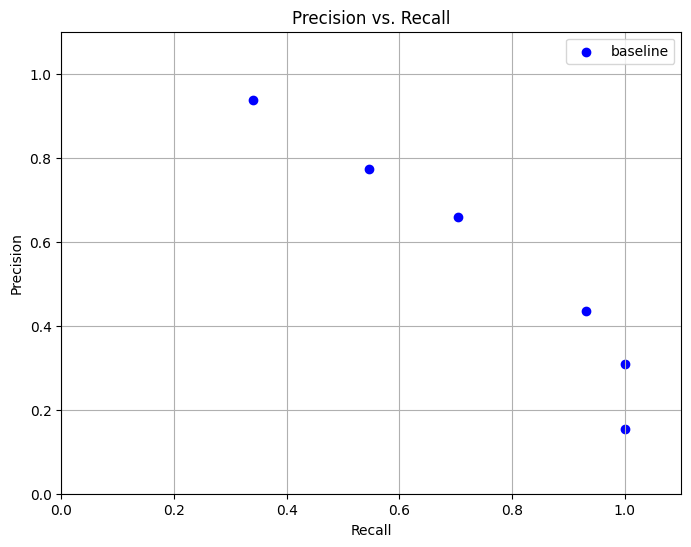

In [19]:
#baseline normal dataset, not modified
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

prec_baseline, rec_baseline, boxes1 = get_list_all_precisions_recalls_boxes(x, y)

visualize_precision_and_recall(prec_baseline, rec_baseline, [], [], 'baseline', '')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

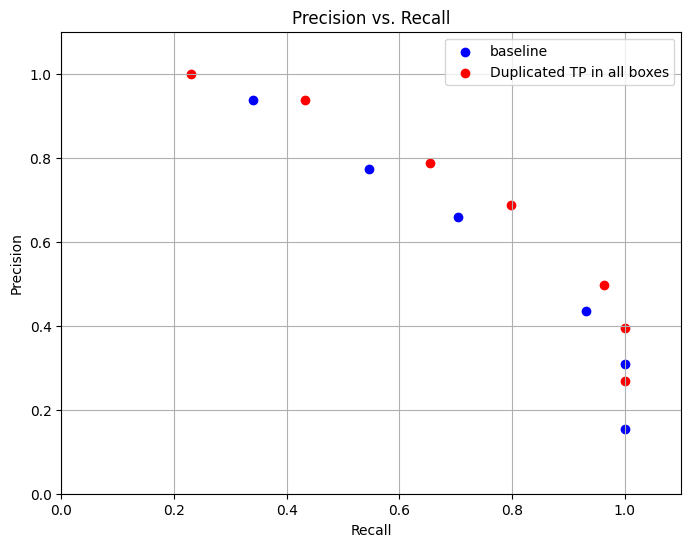

In [20]:
#duplicate 1 in all boxes
lims = boxes1.box_lims
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
labels2 = y.copy()
data2 = x.copy()

#iterate over limit entries which is list of dataframes
for i in range(len(lims)):
    # Iterate over each row of temp_data
    for index, row in x.iterrows():
        is_within_limits = True
        a = 0
        # Check if entry lies within the specified limits
        for column, value in row.iteritems():
            is_within_limits = (lims[i].iloc[0, a] <= value <= lims[i].iloc[1, a]) & is_within_limits
            a = a + 1
        if is_within_limits:
            data2.loc[len(data2)] = row
            labels2.loc[len(labels2)] = y[index]

prec_DupOnesAllBoxes, rec_DupOnesAllBoxes, boxes = get_list_all_precisions_recalls_boxes(data2, labels2)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesAllBoxes, rec_DupOnesAllBoxes, 'baseline', 'Duplicated TP in all boxes')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

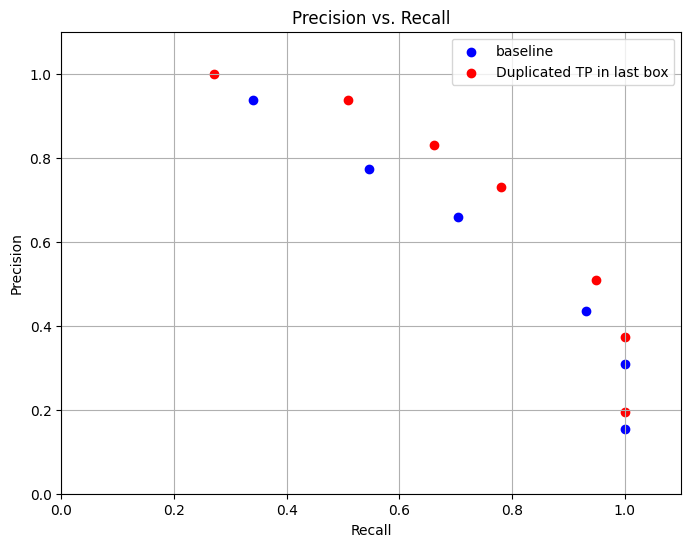

In [23]:
#duplicate 1 in best box
lims = boxes1.box_lims
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
labels3 = y.copy()
data3 = x.copy()

# Iterate over each row of x and duplicate the points which are tp for each box found by prim
for index, row in x.iterrows():
    is_within_limits = True
    # Check if entry lies within the specified limits
    for a, (column, value) in enumerate(row.iteritems()):
        is_within_limits = (lims[len(lims) - 1].iloc[0, a] <= value <= lims[len(lims) - 1].iloc[1, a]) & is_within_limits
    if is_within_limits:
        data3.loc[len(data3)] = row
        labels3.loc[len(labels3)] = y[index]

prec_DupOnesBestBoxes, rec_DupOnesBestBoxes, boxes = get_list_all_precisions_recalls_boxes(data3, labels3)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesBestBoxes, rec_DupOnesBestBoxes, 'baseline', 'Duplicated TP in last box')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

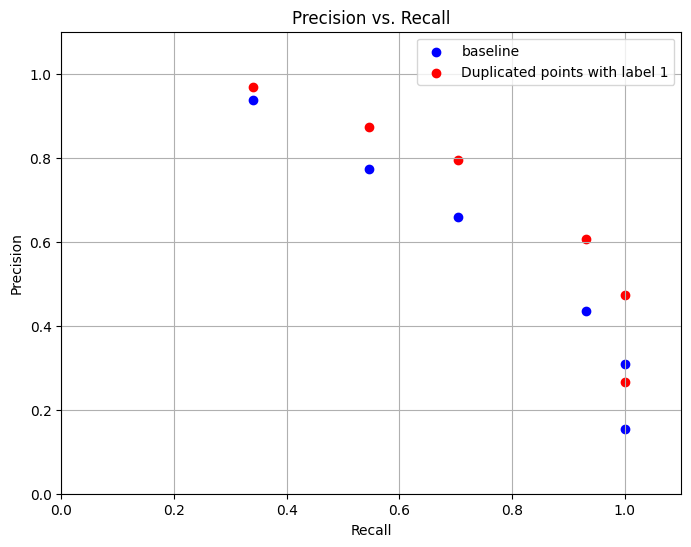

In [24]:
#duplicate all 1en
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

labels4 = y.copy()
data4 = x.copy()

# Iterate over each row of temp_data and duplicate a points with label 1
for index, row in x.iterrows():
    if y[index] == 1:
        data4.loc[len(data4)] = row
        labels4.loc[len(labels4)] = y[index]

prec_DupOnes, rec_DupOnes, boxes = get_list_all_precisions_recalls_boxes(data4, labels4)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnes, rec_DupOnes, 'baseline', 'Duplicated points with label 1')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

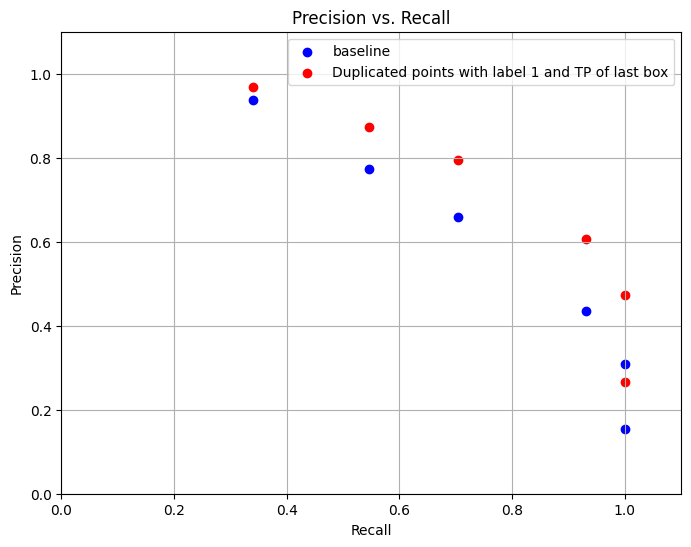

In [28]:
#duplicate all 1s and after duplicate tp
labels5 = labels4.copy()
data5 = data4.copy()

# Iterate over each row of x and duplicate the points which are tp for each box found by prim
for index, row in data4.iterrows():
    is_within_limits = True
    # Check if entry lies within the specified limits
    for a, (column, value) in enumerate(row.iteritems()):
        is_within_limits = (lims[len(lims) - 1].iloc[0, a] <= value <= lims[len(lims) - 1].iloc[1, a]) & is_within_limits
    if is_within_limits:
        data5.loc[len(data5)] = row
        labels5.loc[len(labels5)] = labels4[index]

prec_DupOnes_DupOnesBestBox, rec_DupOnes_DupOnesBestBox, boxes = get_list_all_precisions_recalls_boxes(data5, labels5)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnes, rec_DupOnes, 'baseline', 'Duplicated points with label 1 and TP of last box')

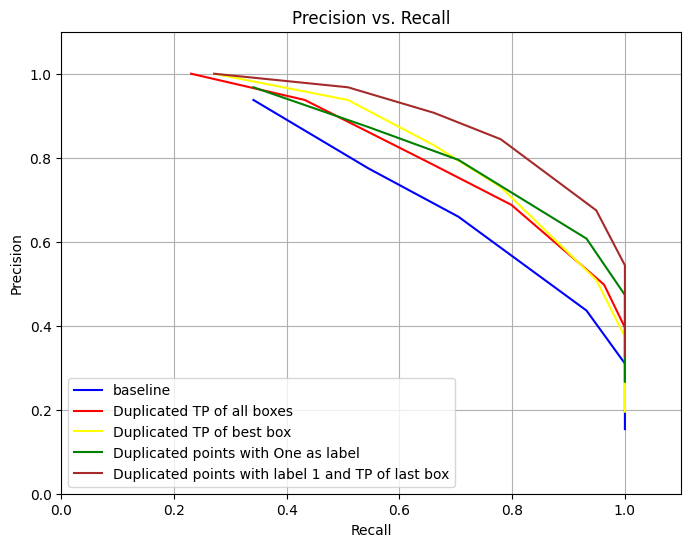

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(rec_baseline, prec_baseline, c='blue', label='baseline')
plt.plot(rec_DupOnesAllBoxes, prec_DupOnesAllBoxes, c='red', label='Duplicated TP of all boxes')
plt.plot(rec_DupOnesBestBoxes, prec_DupOnesBestBoxes, c='yellow', label='Duplicated TP of best box')
plt.plot(rec_DupOnes, prec_DupOnes, c='green', label='Duplicated points with One as label')
plt.plot(rec_DupOnes_DupOnesBestBox, prec_DupOnes_DupOnesBestBox, c='brown', label='Duplicated points with label 1 and TP of last box')

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)

# Add labels and a legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()